In [1]:
# The dataset was provided by the Mexican government (link). This dataset contains an enormous number of 
# anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique 
# features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values 
# as 97 and 99 are missing data.

# sex: 1 for female and 2 for male.
# age: of the patient.
# classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
# degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
# patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
# pneumonia: whether the patient already have air sacs inflammation or not.
# pregnancy: whether the patient is pregnant or not.
# diabetes: whether the patient has diabetes or not.

# copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
# asthma: whether the patient has asthma or not.
# inmsupr: whether the patient is immunosuppressed or not.
# hypertension: whether the patient has hypertension or not.
# cardiovascular: whether the patient has heart or blood vessels related disease.
# renal chronic: whether the patient has chronic renal disease or not.
# other disease: whether the patient has other disease or not.
# obesity: whether the patient is obese or not.
# tobacco: whether the patient is a tobacco user.
# usmr: Indicates whether the patient treated medical units of the first, second or third level.
# medical unit: type of institution of the National Health System that provided the care.
# intubed: whether the patient was connected to the ventilator.
# icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
# date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.




In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import imblearn 

ModuleNotFoundError: No module named 'imblearn'

In [3]:
covid_dataset = pd.read_csv("Covid _Dataset.csv")
covid_dataset.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [4]:
covid_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [5]:
covid_dataset.isnull().sum().sum()

np.int64(0)

In [6]:
df = covid_dataset
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [7]:
for i in df.columns:
    print(i, "=>\t", len(df[i].unique()))

USMER =>	 2
MEDICAL_UNIT =>	 13
SEX =>	 2
PATIENT_TYPE =>	 2
DATE_DIED =>	 401
INTUBED =>	 4
PNEUMONIA =>	 3
AGE =>	 121
PREGNANT =>	 4
DIABETES =>	 3
COPD =>	 3
ASTHMA =>	 3
INMSUPR =>	 3
HIPERTENSION =>	 3
OTHER_DISEASE =>	 3
CARDIOVASCULAR =>	 3
OBESITY =>	 3
RENAL_CHRONIC =>	 3
TOBACCO =>	 3
CLASIFFICATION_FINAL =>	 7
ICU =>	 4


In [8]:
df.DATE_DIED.value_counts()

DATE_DIED
9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
26/03/2021         1
31/03/2021         1
02/04/2021         1
13/04/2021         1
22/04/2021         1
Name: count, Length: 401, dtype: int64

In [9]:
df.PNEUMONIA.value_counts()

PNEUMONIA
2     892534
1     140038
99     16003
Name: count, dtype: int64

In [10]:
df = df[(df.PNEUMONIA == 1) | (df.PNEUMONIA == 2)]
df = df[(df.DIABETES == 1) | (df.DIABETES == 2)]
df = df[(df.COPD == 1) | (df.COPD == 2)]
df = df[(df.ASTHMA == 1) | (df.ASTHMA == 2)]
df = df[(df.INMSUPR == 1) | (df.INMSUPR == 2)]
df = df[(df.HIPERTENSION == 1) | (df.HIPERTENSION == 2)]
df = df[(df.OTHER_DISEASE == 1) | (df.OTHER_DISEASE == 2)]
df = df[(df.CARDIOVASCULAR == 1) | (df.CARDIOVASCULAR == 2)]
df = df[(df.OBESITY == 1) | (df.OBESITY == 2)]
df = df[(df.RENAL_CHRONIC == 1) | (df.RENAL_CHRONIC == 2)]
df = df[(df.TOBACCO == 1) | (df.TOBACCO == 2)]

In [11]:
#if we have the date as 9999-99-99 values that the patient is alive
df['DEATH'] = [2 if each == '9999-99-99' else 1 for each in df.DATE_DIED]

In [12]:
df.drop(columns = ['INTUBED', 'ICU', 'DATE_DIED'], inplace = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1025152 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype
---  ------                --------------    -----
 0   USMER                 1025152 non-null  int64
 1   MEDICAL_UNIT          1025152 non-null  int64
 2   SEX                   1025152 non-null  int64
 3   PATIENT_TYPE          1025152 non-null  int64
 4   PNEUMONIA             1025152 non-null  int64
 5   AGE                   1025152 non-null  int64
 6   PREGNANT              1025152 non-null  int64
 7   DIABETES              1025152 non-null  int64
 8   COPD                  1025152 non-null  int64
 9   ASTHMA                1025152 non-null  int64
 10  INMSUPR               1025152 non-null  int64
 11  HIPERTENSION          1025152 non-null  int64
 12  OTHER_DISEASE         1025152 non-null  int64
 13  CARDIOVASCULAR        1025152 non-null  int64
 14  OBESITY               1025152 non-null  int64
 15  RENAL_CHRONIC       

In [14]:
for i in df.columns:
    print(i, "=>\t", len(df[i].unique()))

USMER =>	 2
MEDICAL_UNIT =>	 13
SEX =>	 2
PATIENT_TYPE =>	 2
PNEUMONIA =>	 2
AGE =>	 121
PREGNANT =>	 4
DIABETES =>	 2
COPD =>	 2
ASTHMA =>	 2
INMSUPR =>	 2
HIPERTENSION =>	 2
OTHER_DISEASE =>	 2
CARDIOVASCULAR =>	 2
OBESITY =>	 2
RENAL_CHRONIC =>	 2
TOBACCO =>	 2
CLASIFFICATION_FINAL =>	 7
DEATH =>	 2


In [15]:
irrelevent_columns = ['SEX', 'PREGNANT', 'COPD', 'ASTHMA', 'INMSUPR', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'TOBACCO']
df.drop(columns = irrelevent_columns, inplace = True)

In [16]:
df.head()

,USMER,MEDICAL_UNIT,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,HIPERTENSION,RENAL_CHRONIC,CLASIFFICATION_FINAL,DEATH
0,2,1,1,1,65,2,1,2,3,1
1,2,1,1,1,72,2,1,1,5,1
2,2,1,2,2,55,1,2,2,3,1
3,2,1,1,2,53,2,2,2,7,1
4,2,1,1,2,68,1,1,2,3,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1025152 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column                Non-Null Count    Dtype
---  ------                --------------    -----
 0   USMER                 1025152 non-null  int64
 1   MEDICAL_UNIT          1025152 non-null  int64
 2   PATIENT_TYPE          1025152 non-null  int64
 3   PNEUMONIA             1025152 non-null  int64
 4   AGE                   1025152 non-null  int64
 5   DIABETES              1025152 non-null  int64
 6   HIPERTENSION          1025152 non-null  int64
 7   RENAL_CHRONIC         1025152 non-null  int64
 8   CLASIFFICATION_FINAL  1025152 non-null  int64
 9   DEATH                 1025152 non-null  int64
dtypes: int64(10)
memory usage: 86.0 MB


In [18]:
#preparing categorical features that are not binary 
 
df = pd.get_dummies(df, columns = ['MEDICAL_UNIT', 'CLASIFFICATION_FINAL'], drop_first = True)

In [19]:
# scaling numeric feature 

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df.AGE = scaler.fit_transform(df.AGE.values.reshape(-1, 1)) 

In [20]:
x = df.drop(columns = "DEATH")
y = df["DEATH"]

In [21]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 42)
print('TRAIN_X: ', train_x.shape)
print('TEST_X: ', test_x.shape)
print('TRAIN_Y: ', train_y.shape)
print('TEST_Y: ', test_y.shape)

TRAIN_X:  (820121, 25)
TEST_X:  (205031, 25)
TRAIN_Y:  (820121,)
TEST_Y:  (205031,)


In [22]:
#logisitic regression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(train_x, train_y) 
print("Logisitic Regression Score: ", log_reg.score(test_x, test_y))

Logisitic Regression Score:  0.9400919860899084


In [23]:
from sklearn.metrics import f1_score
print("Logisitic Regression F1 score: ", f1_score(test_y, log_reg.predict(test_x), average = None))

Logisitic Regression F1 score:  [0.52430192 0.96803308]


Text(0.5, 1.0, 'Logistic Regression Confusion Matri')

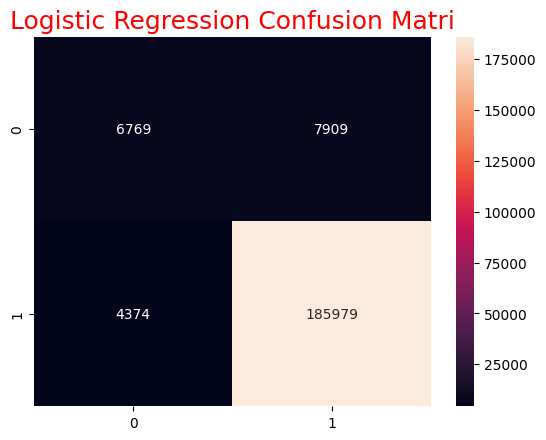

In [24]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(test_y, log_reg.predict(test_x)), annot = True, fmt = ".0f")
plt.title('Logistic Regression Confusion Matri', fontsize = 18, color = 'red')

C:\Users\Zacharia\AppData\Local\Temp\ipykernel_18256\1149674716.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df.DEATH, palette=sns.cubehelix_palette(2))


Text(0.5, 1.0, 'Death Distribution')

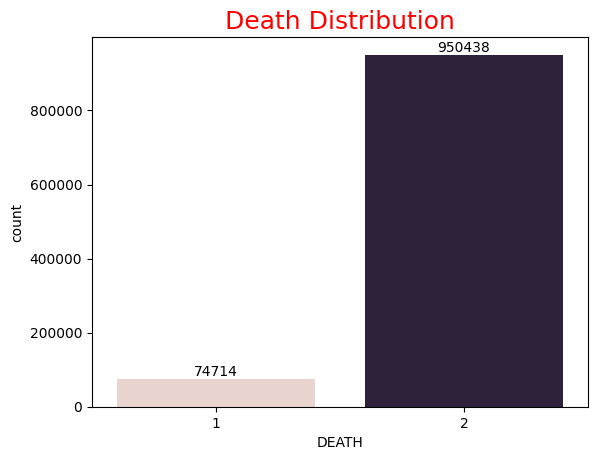

In [25]:
# Check death distribution

ax = sns.countplot(x=df.DEATH, palette=sns.cubehelix_palette(2))

# Loop through all bar containers and label each
for container in ax.containers:
    ax.bar_label(container)

plt.title("Death Distribution", fontsize=18, color="red")

Text(0.5, 1.0, 'Correlation Between Features')

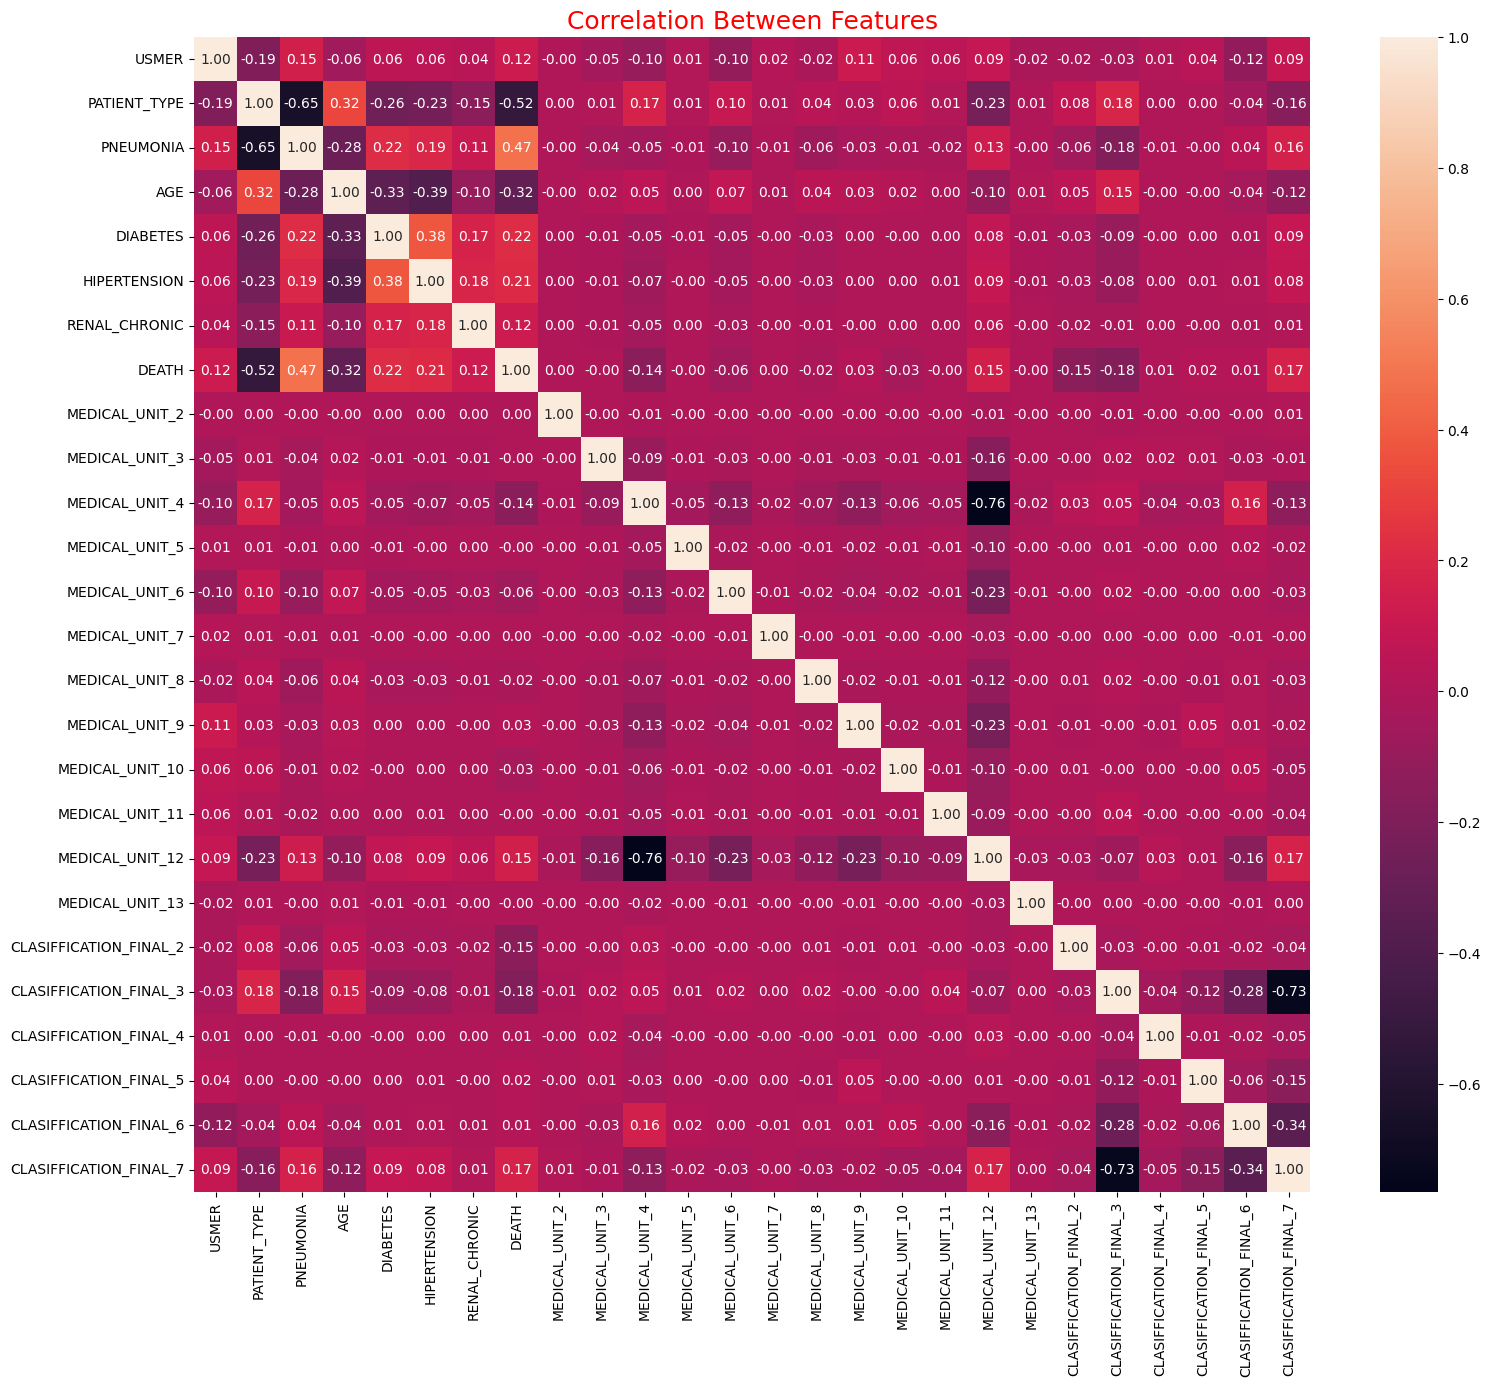

In [26]:
plt.figure(figsize = (18, 15))
sns.heatmap(df.corr(), annot = True, fmt = '.2f')
plt.title("Correlation Between Features", fontsize = 18, color = 'red')

In [28]:
df.columns

Index(['USMER', 'PATIENT_TYPE', 'PNEUMONIA', 'AGE', 'DIABETES', 'HIPERTENSION',
       'RENAL_CHRONIC', 'DEATH', 'MEDICAL_UNIT_2', 'MEDICAL_UNIT_3',
       'MEDICAL_UNIT_4', 'MEDICAL_UNIT_5', 'MEDICAL_UNIT_6', 'MEDICAL_UNIT_7',
       'MEDICAL_UNIT_8', 'MEDICAL_UNIT_9', 'MEDICAL_UNIT_10',
       'MEDICAL_UNIT_11', 'MEDICAL_UNIT_12', 'MEDICAL_UNIT_13',
       'CLASIFFICATION_FINAL_2', 'CLASIFFICATION_FINAL_3',
       'CLASIFFICATION_FINAL_4', 'CLASIFFICATION_FINAL_5',
       'CLASIFFICATION_FINAL_6', 'CLASIFFICATION_FINAL_7'],
      dtype='object')

In [ ]:
'''
How to solve imbalanced dataset problem: 
1. Loading more datas
2. Changing the performance metrics
3. Resampling (undersampling or oversampling)
4. Changing the algorithm
5. Penalizing the models
'''

In [35]:
from imblearn.under_sampling import RandomUnderSampler
res = RandomUnderSampler(random_state = 0)
x_resampled, y_resampled = res.fit_resample(x, y)

C:\Users\Zacharia\AppData\Local\Temp\ipykernel_18256\379161431.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = y_resampled, palette=sns.cubehelix_palette(2))


Text(0.5, 1.0, 'Death Distribution')

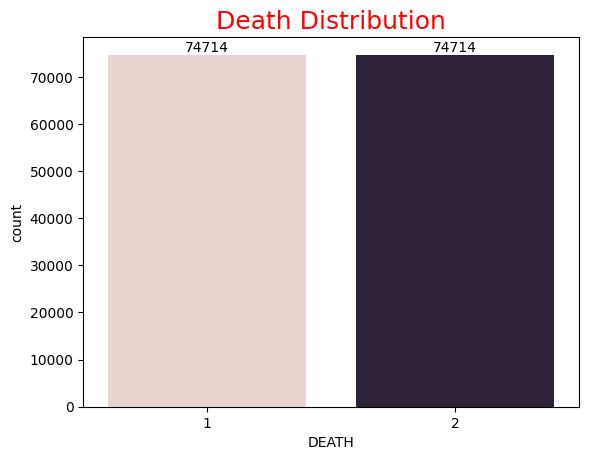

In [36]:
ax = sns.countplot(x = y_resampled, palette=sns.cubehelix_palette(2))

# Loop through all bar containers and label each
for container in ax.containers:
    ax.bar_label(container)

plt.title("Death Distribution", fontsize=18, color="red")


In [37]:
train_x, test_x, train_y, test_y = train_test_split(x_resampled, y_resampled, test_size = 0.2, random_state = 42)
print('TRAIN_X: ', train_x.shape)
print('TEST_X: ', test_x.shape)
print('TRAIN_Y: ', train_y.shape)
print('TEST_Y: ', test_y.shape)

TRAIN_X:  (119542, 25)
TEST_X:  (29886, 25)
TRAIN_Y:  (119542,)
TEST_Y:  (29886,)


In [38]:
# logistic regression after undersampling
log_reg = LogisticRegression()
log_reg.fit(train_x, train_y)
print("Logistic Regression Accuracy: ", log_reg.score(test_x, test_y))

Logistic Regression Accuracy:  0.9116643244328448


In [39]:
print("Logisitic Regression F1 score: ", f1_score(test_y, log_reg.predict(test_x), average = None))

Logisitic Regression F1 score:  [0.91290578 0.91038697]


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

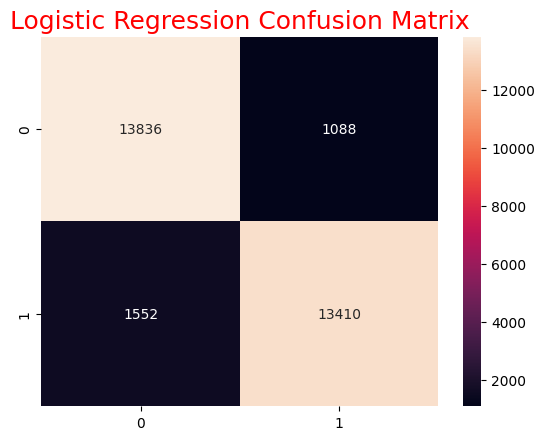

In [41]:
sns.heatmap(confusion_matrix(test_y, log_reg.predict(test_x)), annot = True, fmt = ".0f")
plt.title('Logistic Regression Confusion Matrix', fontsize = 18, color = 'red')